## Import libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For the predictive models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier as GBSklearn
from xgboost import XGBClassifier as XGB

import keras
from keras.models import Sequential
from keras.layers import Dense


# Removing annoying warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## 1- Data Analysis 

In [71]:
df = pd.read_csv('../data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
# Get the data type for every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
# Generate descriptive statistics of the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [74]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
# Get the count of unique values in each column
df.nunique()  

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [76]:
# Check for duplicate values 
df.duplicated().sum()

0

In [77]:
# These columns are not needed for the moment
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


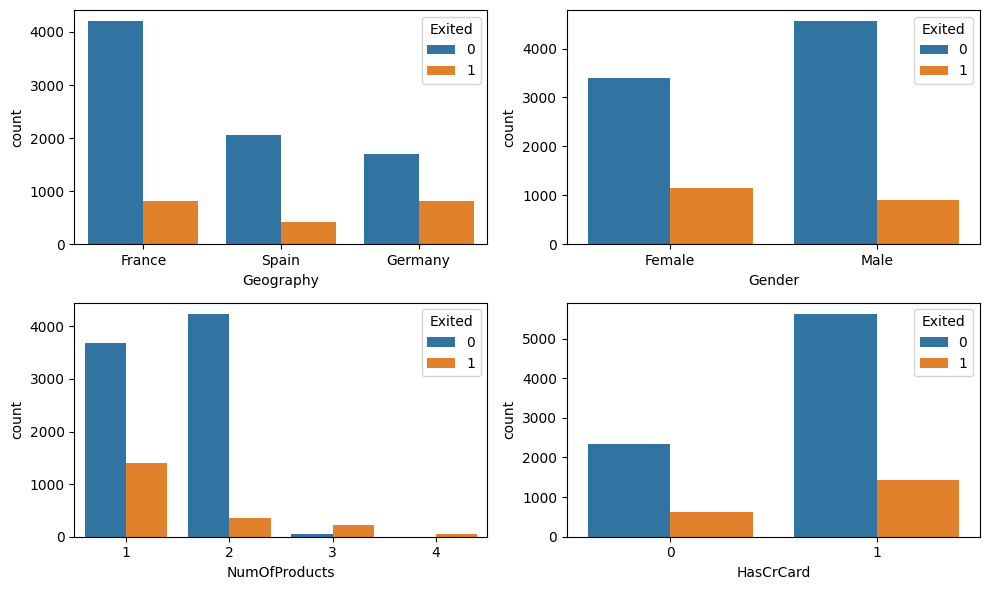

In [78]:
# Check the distribution of the different columns, we will start with the categorical features in this cell.

categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()


# of Bivariate Outliers: 19


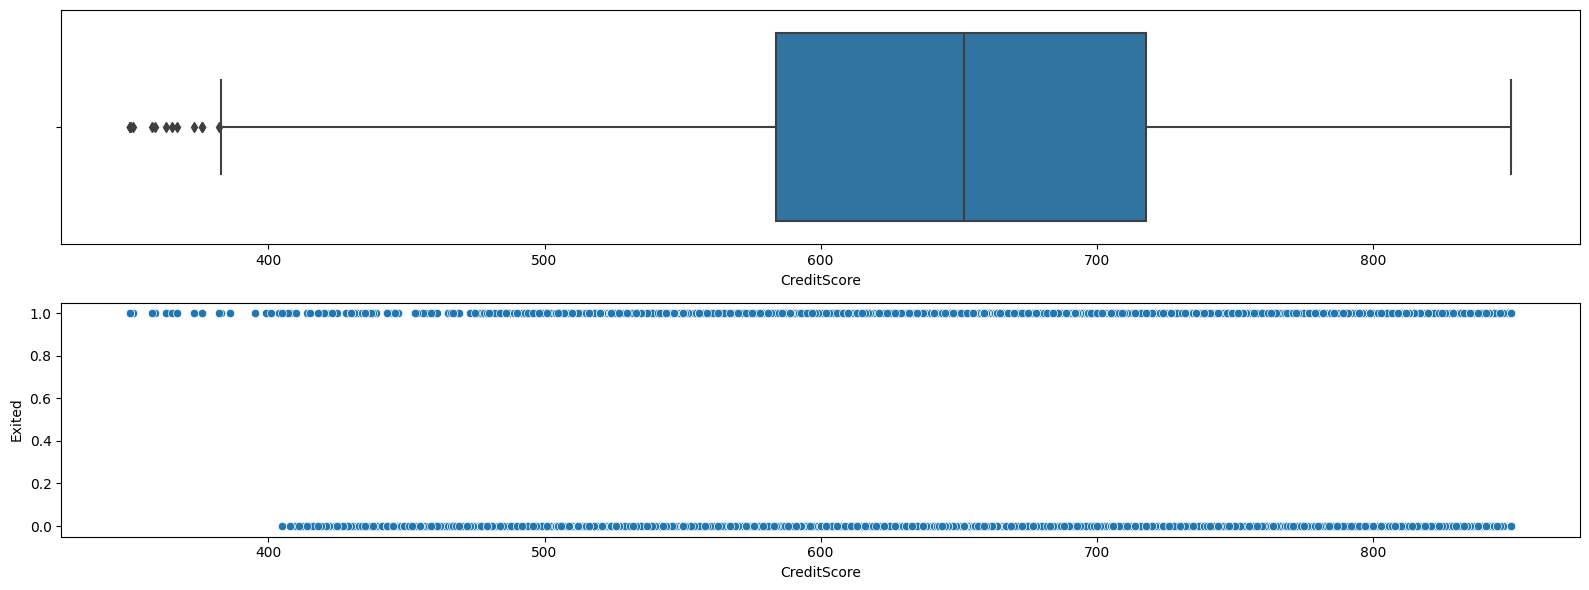

In [79]:
# Check the distribution of the numerical columns

def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)
    
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")
df.drop(df[df['CreditScore']<400].index, inplace =True)

# of Bivariate Outliers: 6


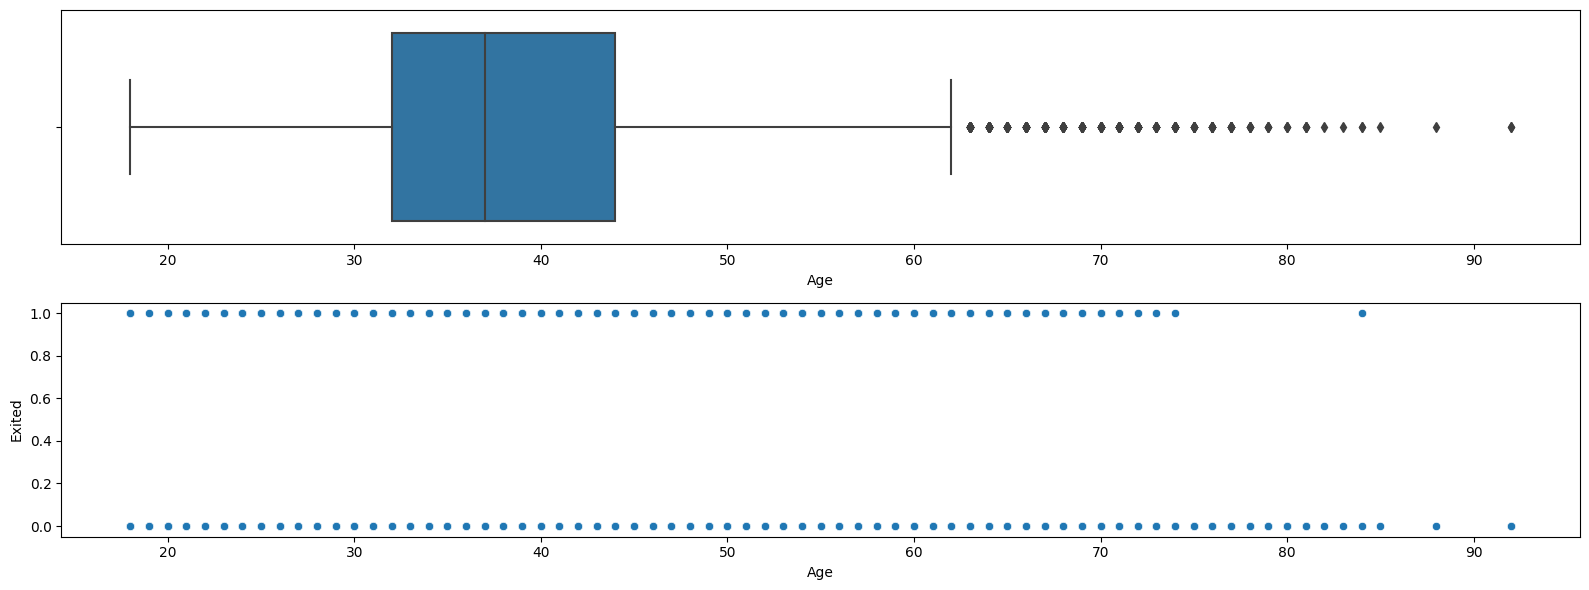

In [80]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 83])}")
df.drop(df[df['Age'] > 83].index, inplace =True)

# of Bivariate Outliers: 4


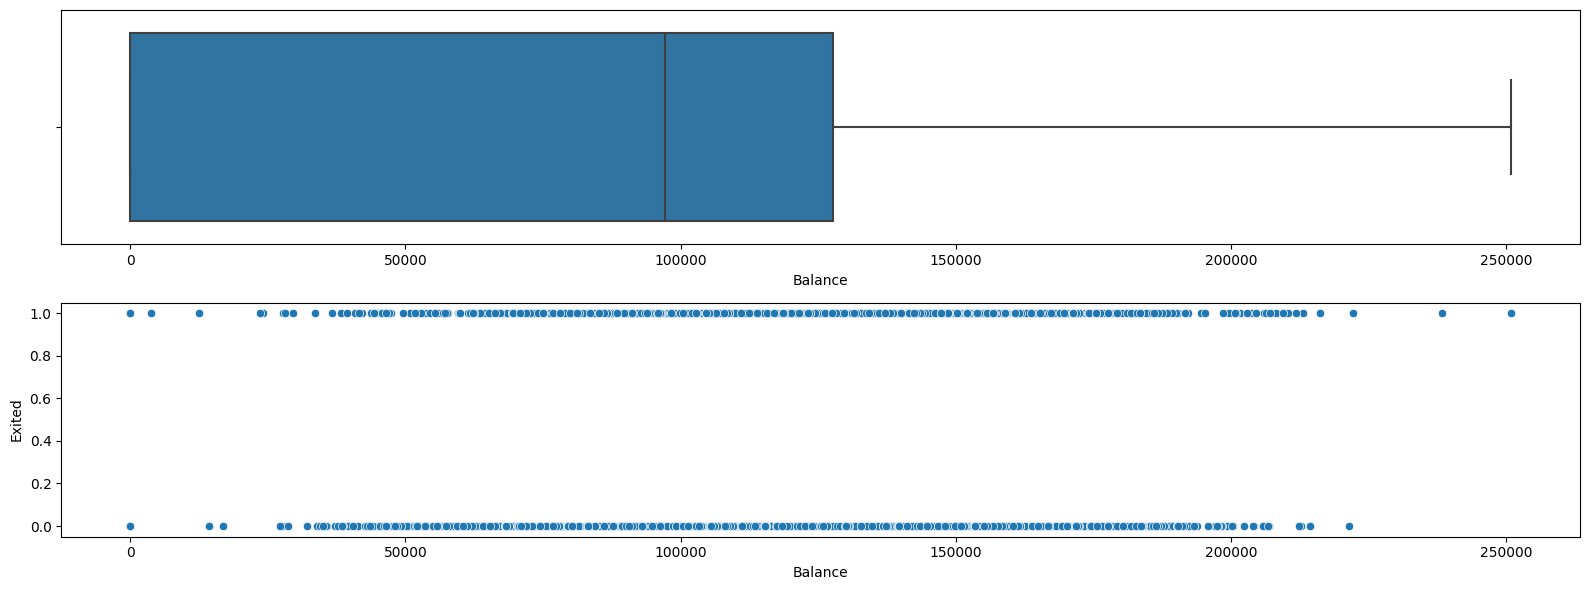

In [81]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")
df.drop(df[df['Balance'] > 220000].index, inplace =True)

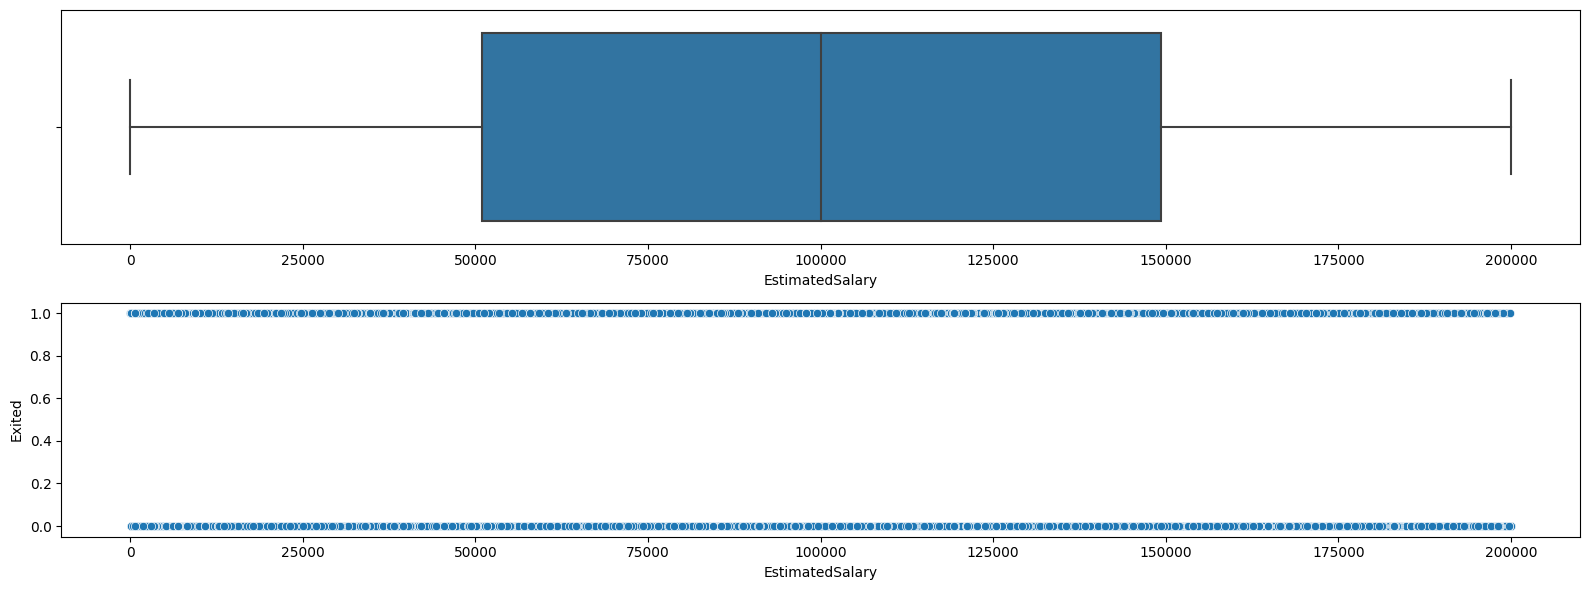

In [82]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

Obervation :

- No missing values
- Contains Skewed variables
- Target is imbalanced
- Contains Outliers
- Contains Categorical variables
- Different scales

Outliers were removed based on values from the scatter and box plots.

In [83]:
# The below functions are needed for analysis purposes

def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['pct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()

def classification_report_to_dataframe(true, predictions, predictions_proba, model_name, balanced = 'no'):
    a = classification_report(true, predictions, output_dict = True)
    zeros = pd.DataFrame(data = a['0'], index = [0]).iloc[:,0:3].add_suffix('_0')
    ones = pd.DataFrame(data = a['1'], index = [0]).iloc[:,0:3].add_suffix('_1')
    df = pd.concat([zeros, ones], axis = 1)
    temp = list(df)
    df['Model'] = model_name
    df['Balanced'] = balanced
    df['Accuracy'] = accuracy_score(true, predictions)
    df['Balanced_Accuracy'] = balanced_accuracy_score(true, predictions)
    df['AUC'] = roc_auc_score(true, predictions_proba, average = 'macro')
    df = df[['Model', 'Balanced', 'Accuracy', 'Balanced_Accuracy', 'AUC'] + temp]
    return df

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [84]:
exited = len(df[df['Exited'] == 1]['Exited'])
not_exited = len(df[df['Exited'] == 0]['Exited'])
exited_perc = round(exited/len(df)*100,1)
not_exited_perc = round(not_exited/len(df)*100,1)

print('Number of clients that have exited the program: {} ({}%)'.format(exited, exited_perc))
print('Number of clients that haven\'t exited the program: {} ({}%)'.format(not_exited, not_exited_perc))

Number of clients that have exited the program: 2014 (20.2%)
Number of clients that haven't exited the program: 7957 (79.8%)


So, around of 20% of the clients exited the bank, while around 80% stayed. As the goal here is to identify which of the customers are at higher risk to discontinue their services with the bank, we are dealing with a classification problem.

A important point to take into consideration here is that we are dealing with an imbalanced dataset.

In [85]:
gender_count = df['Gender'].value_counts()
gender_pct= gender_count / len(df.index)

gender = pd.concat([gender_count, round(gender_pct,2)], axis=1).set_axis(['count', 'pct'], axis=1)
gender

,count,pct
Gender,,
Male,5442,0.55
Female,4529,0.45


In [86]:
count_by_group(df, feature = 'Gender', target = 'Exited')

,Gender,Exited,count,pct
0,Female,0,3403,75.13800
1,Female,1,1126,24.86200
2,Male,0,4554,83.68247
3,Male,1,888,16.31753


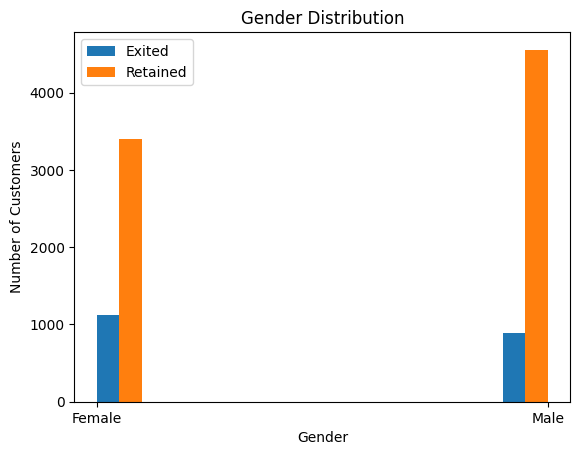

In [87]:
gender_exited = df[df['Exited']==1].Gender  # closed their accounts
gender_retained = df[df['Exited']==0].Gender   # not closed their accounts
plt.hist([gender_exited,gender_retained],rwidth=1.95,label =['Exited','Retained'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title("Gender Distribution")
plt.legend()
plt.show()

In this df, there are more men (55%) than women (45%). Female Customers have a higher tendency to exit and close their accounts compared to male customers.

In [88]:
geo_count = df['Geography'].value_counts()
geo_pct= geo_count / len(df.index)

geo = pd.concat([geo_count, round(geo_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1)
geo

,count,pct
Geography,,
France,5003,0.50
Germany,2502,0.25
Spain,2466,0.25


In [89]:
count_by_group(df, feature = 'Geography', target = 'Exited')


,Geography,Exited,count,pct
0,France,0,4201,83.969618
1,France,1,802,16.030382
2,Germany,0,1694,67.705835
3,Germany,1,808,32.294165
4,Spain,0,2062,83.617194
5,Spain,1,404,16.382806


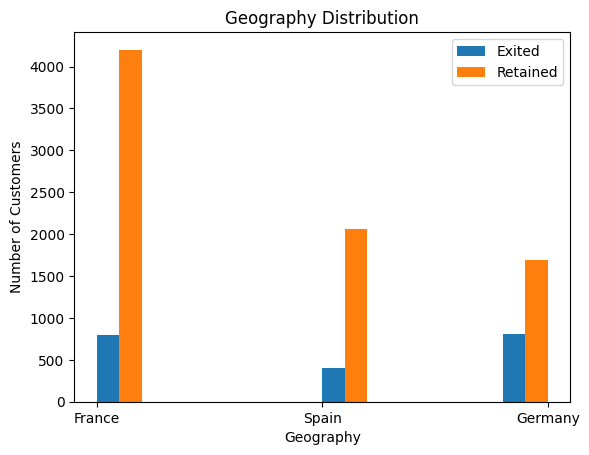

In [90]:
Geography_not_exited = df[df['Exited']==0].Geography
Geography_exited = df[df['Exited']==1].Geography


plt.hist([Geography_exited,Geography_not_exited],rwidth=1.95,label =['Exited','Retained'])
plt.xlabel('Geography')

plt.ylabel('Number of Customers')
plt.title("Geography Distribution")
plt.legend()
plt.show()

The dataset covers 3 countries ; France, Spain, and Germany. Where 50% of the customers are from France and 25% are from Germany, and the other group are from Spain.
Germany has the lowest percentage of retainers , that equals 67% while spain and france have almost the same percentage which is 83%.


In [91]:
HasCrCard_count = df['HasCrCard'].value_counts()
HasCrCard_pct= HasCrCard_count / len(df.index)

HasCrCard = pd.concat([HasCrCard_count, HasCrCard_pct], axis=1).set_axis(['count', 'pct'], axis=1)

HasCrCard

,count,pct
HasCrCard,,
1,7034,0.705446
0,2937,0.294554


In [92]:
count_by_group(df, feature = 'HasCrCard', target = 'Exited')

,HasCrCard,Exited,count,pct
0,0,0,2331,79.366701
1,0,1,606,20.633299
2,1,0,5626,79.982940
3,1,1,1408,20.017060


In [93]:
IsActiveMember_count = df['IsActiveMember'].value_counts()
IsActiveMember_pct= HasCrCard_count / len(df.index)

IsActiveMember = pd.concat([IsActiveMember_count, IsActiveMember_pct], axis=1).set_axis(['count', 'pct'], axis=1)

IsActiveMember

,count,pct
1,5138,0.705446
0,4833,0.294554


In [94]:
count_by_group(df, feature = 'IsActiveMember', target = 'Exited')


,IsActiveMember,Exited,count,pct
0,0,0,3546,73.370577
1,0,1,1287,26.629423
2,1,0,4411,85.850525
3,1,1,727,14.149475


In [95]:
NumOfProducts_count = df['NumOfProducts'].value_counts()
NumOfProducts_pct= NumOfProducts_count / len(df.index)

NumOfProducts = pd.concat([NumOfProducts_count, round(NumOfProducts_pct,2)], axis=1).set_axis(['count', 'pct'], axis=1)
NumOfProducts

,count,pct
NumOfProducts,,
1,5063,0.51
2,4586,0.46
3,263,0.03
4,59,0.01


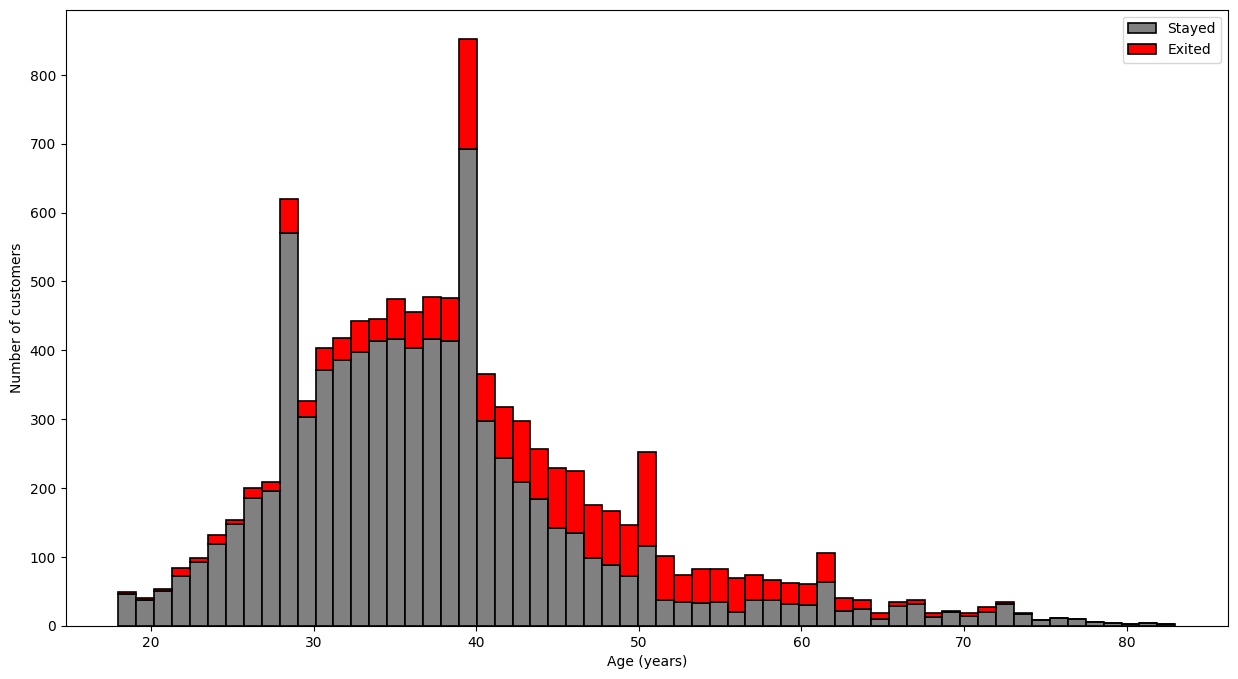

In [96]:
#Stacked histogram: Age
figure = plt.figure(figsize=(15,8))
plt.hist([
        df[(df.Exited==0)]['Age'],
        df[(df.Exited==1)]['Age']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend()

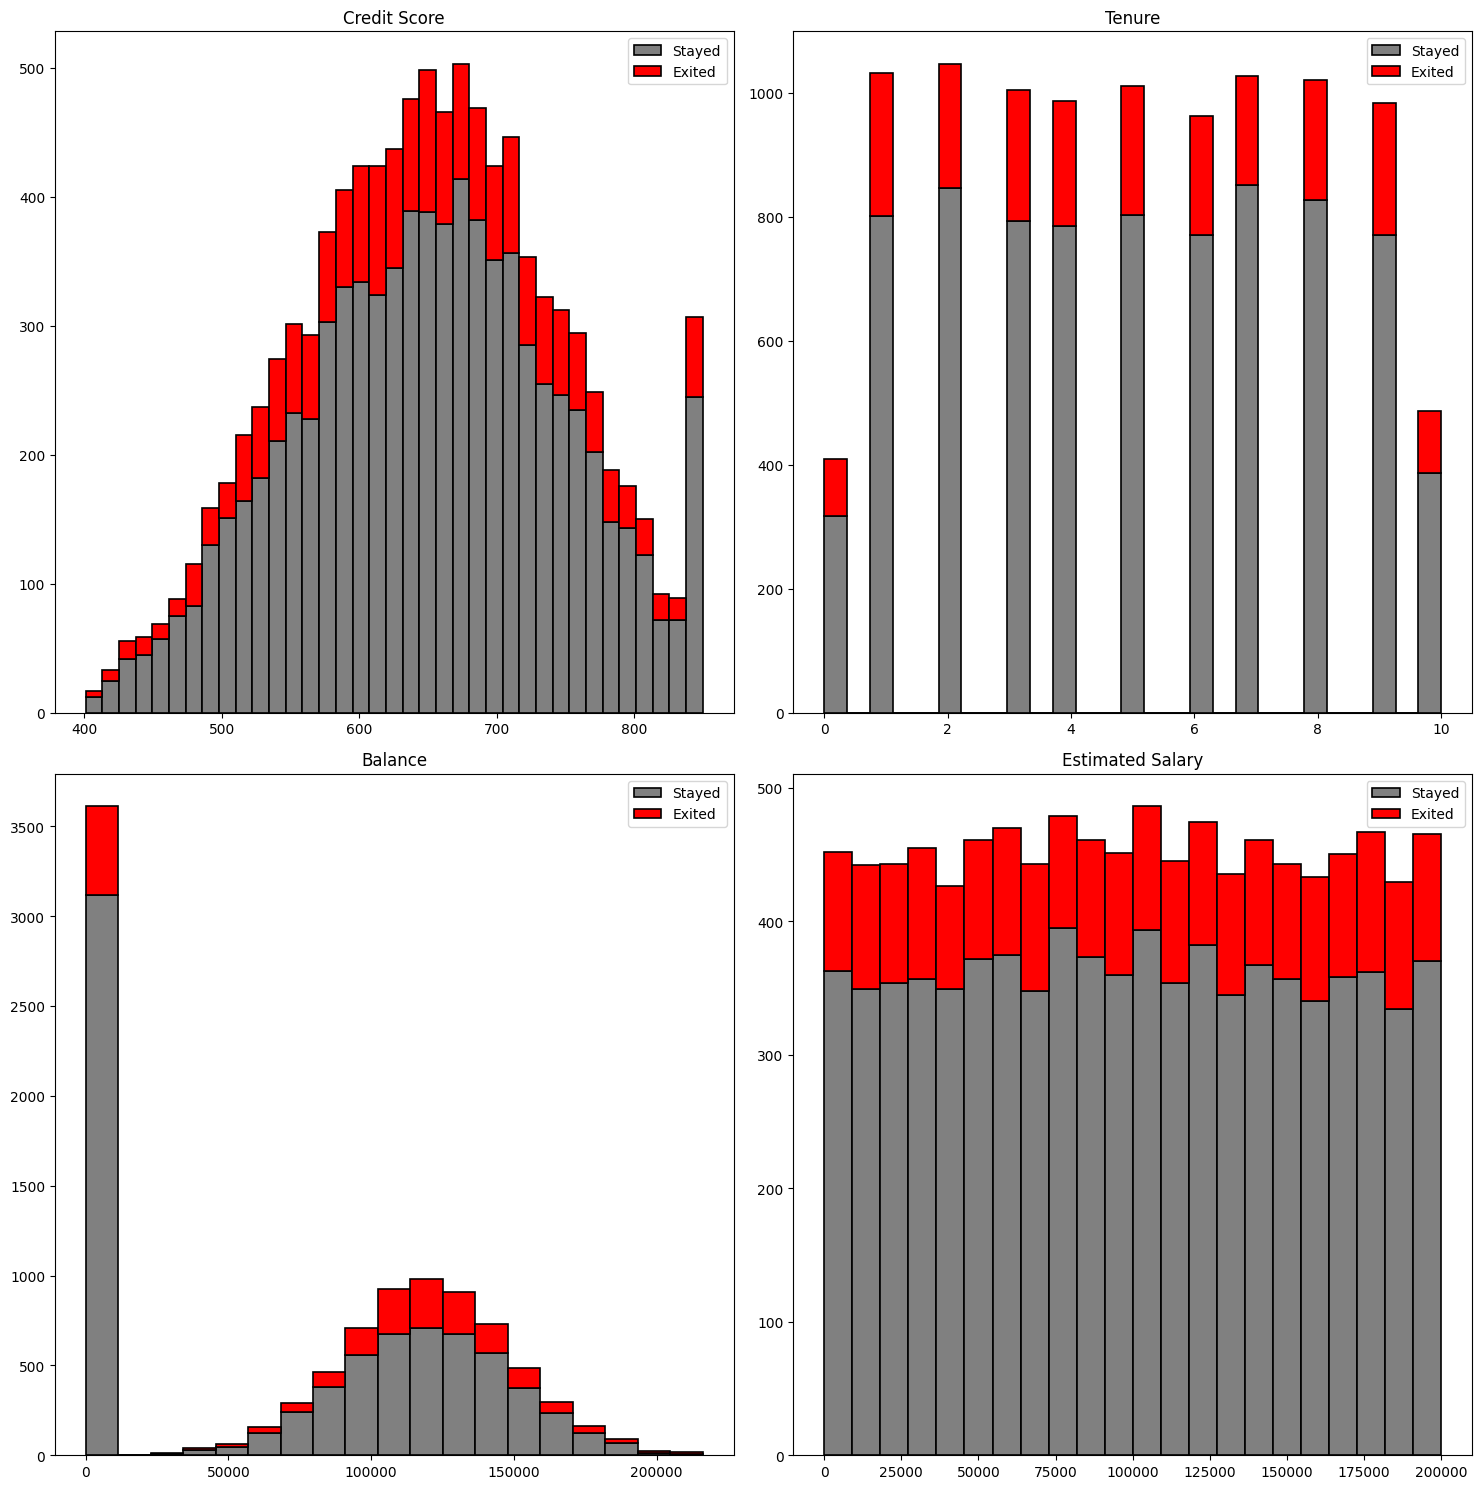

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
fig.subplots_adjust(left=0.2, wspace=0.6)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist([
        df[(df.Exited==0)]['CreditScore'],
        df[(df.Exited==1)]['CreditScore']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax0.legend()
ax0.set_title('Credit Score')

ax1.hist([
        df[(df.Exited==0)]['Tenure'],
        df[(df.Exited==1)]['Tenure']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax1.legend()
ax1.set_title('Tenure')

ax2.hist([
        df[(df.Exited==0)]['Balance'],
        df[(df.Exited==1)]['Balance']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax2.legend()
ax2.set_title('Balance')

ax3.hist([
        df[(df.Exited==0)]['EstimatedSalary'],
        df[(df.Exited==1)]['EstimatedSalary']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax3.legend()
ax3.set_title('Estimated Salary')

fig.tight_layout()
plt.show()


From the tables and plots above, we can have some insights:

- As for gender, women are lower in number than the men, but have a higher tendendy to churn.
- There is a higher rate of exited clients in Germany (32%, which is about 2x higher), and lower in Spain and France (around 16% each).
- On age, customer bellow 40 and above 65 years old have a tendency to keep their account.
- Has or not credit card does not impact on the decision to stay in the bank (both groups has 20% of exited customers)
- Non active members tend to discontinue their services with a bank compared with the active clients (27% vs 14%).
- The df has 96% of clients with 1 or 2 product, and customers with 1 product only have a higher rate to to close the account than those with 2 products (around 3x higher).
- Estimated Salary does not seem to affect the churn rate.

## 2- Predictive Models
### 2.1 - Using the unbalanced dataset
#### 2.1.1 - Logistic Regression Model

In [98]:
# One-Hot encoding our categorical attributes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [99]:
features = list(df.drop('Exited', axis = 1))
target = 'Exited'

In [100]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1)

print('Number of clients in the df: {}'.format(len(df)))
print('Number of clients in the train set: {}'.format(len(train)))
print('Number of clients in the test set: {}'.format(len(test)))

Number of clients in the df: 9971
Number of clients in the train set: 7976
Number of clients in the test set: 1995


In [101]:
exited_train = len(train[train['Exited'] == 1]['Exited'])
exited_train_perc = round(exited_train/len(train)*100,1)

exited_test = len(test[test['Exited'] == 1]['Exited'])
exited_test_perc = round(exited_test/len(test)*100,1)

print('Complete Train set - Number of clients that have exited the program: {} ({}%)'.format(exited_train, exited_train_perc))
print('Test set - Number of clients that haven\'t exited the program: {} ({}%)'.format(exited_test, exited_test_perc))

Complete Train set - Number of clients that have exited the program: 1626 (20.4%)
Test set - Number of clients that haven't exited the program: 388 (19.4%)


The features in the data are of varying magnitudes, and while tree-based models can handle such data without normalization, logistic regression and neural networks (MLP) require data normalization to achieve optimal performance. We are using the standard scaler from sklearn.

In [102]:
#Feature scaling

scaling_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']  

sc = StandardScaler()
# fit on training set
train[scaling_cols] = sc.fit_transform(train[scaling_cols])

# only transform on test set
test[scaling_cols] = sc.transform(test[scaling_cols])

To make the initial prediction, we will utilize the Sklearn Logistic Regression model and search for the best parameters by utilizing the GridSearchCV function.

In [103]:
# Let's start with a simple classification model, the classical logistic regression algorithm:
parameters = {'C': [0.01, 0.1, 1, 10],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [50, 100, 150]}
LR = LogisticRegression(penalty = 'l2')
model_LR = GridSearchCV(LR, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(train[features], train[target])
pd.DataFrame(model_LR.cv_results_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044171,0.003526,0.003649,0.001451,0.01,50,newton-cg,"{'C': 0.01, 'max_iter': 50, 'solver': 'newton-...",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
1,0.022351,0.008323,0.005076,0.001844,0.01,50,lbfgs,"{'C': 0.01, 'max_iter': 50, 'solver': 'lbfgs'}",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
2,0.019341,0.001351,0.003467,0.001206,0.01,50,liblinear,"{'C': 0.01, 'max_iter': 50, 'solver': 'libline...",0.805138,0.804389,0.801254,0.803135,0.802508,0.803285,0.001371,46
3,0.029468,0.003089,0.003309,0.001022,0.01,50,sag,"{'C': 0.01, 'max_iter': 50, 'solver': 'sag'}",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
4,0.034708,0.003675,0.002813,0.000591,0.01,50,saga,"{'C': 0.01, 'max_iter': 50, 'solver': 'saga'}",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
5,0.038221,0.010364,0.003714,0.001529,0.01,100,newton-cg,"{'C': 0.01, 'max_iter': 100, 'solver': 'newton...",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
6,0.017857,0.005443,0.003766,0.001266,0.01,100,lbfgs,"{'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
7,0.023273,0.005318,0.003667,0.001021,0.01,100,liblinear,"{'C': 0.01, 'max_iter': 100, 'solver': 'liblin...",0.805138,0.804389,0.801254,0.803135,0.802508,0.803285,0.001371,46
8,0.033901,0.003564,0.003450,0.000640,0.01,100,sag,"{'C': 0.01, 'max_iter': 100, 'solver': 'sag'}",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49
9,0.040920,0.004333,0.003127,0.000428,0.01,100,saga,"{'C': 0.01, 'max_iter': 100, 'solver': 'saga'}",0.798872,0.805016,0.796865,0.796238,0.799373,0.799273,0.003103,49


In [104]:
print(model_LR.best_params_)

{'C': 1, 'max_iter': 50, 'solver': 'liblinear'}


Now that we know the "best" parameters for the model, let's do a Recursive Feature Elimination to check the feature importance.

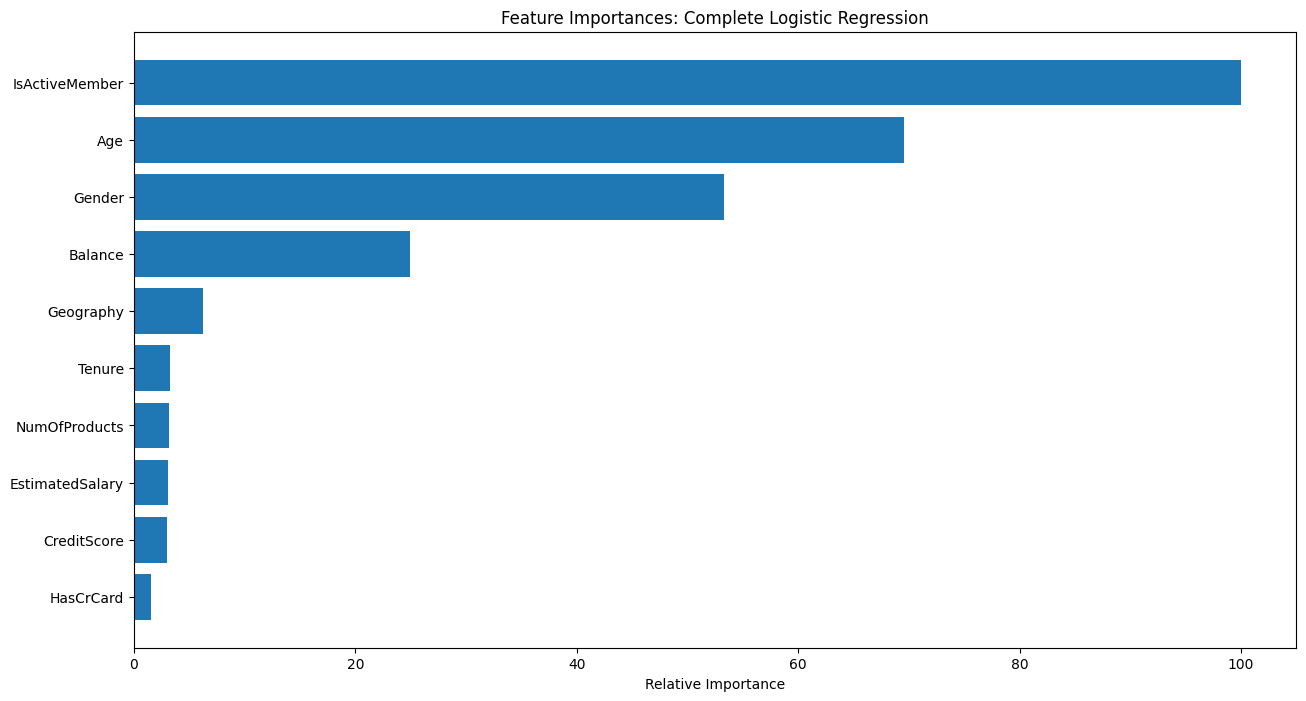

In [105]:
model = LogisticRegression(**model_LR.best_params_)
model.fit(train[features], train[target])

importances = abs(model.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Complete Logistic Regression')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Now, let's make the prediction for the test set, for which we know the actual values, in order to evaluate the performance of the model.

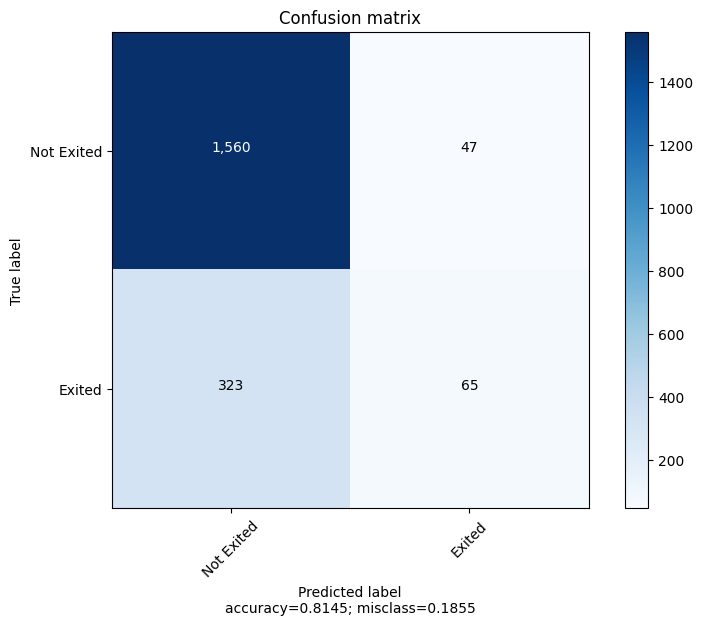

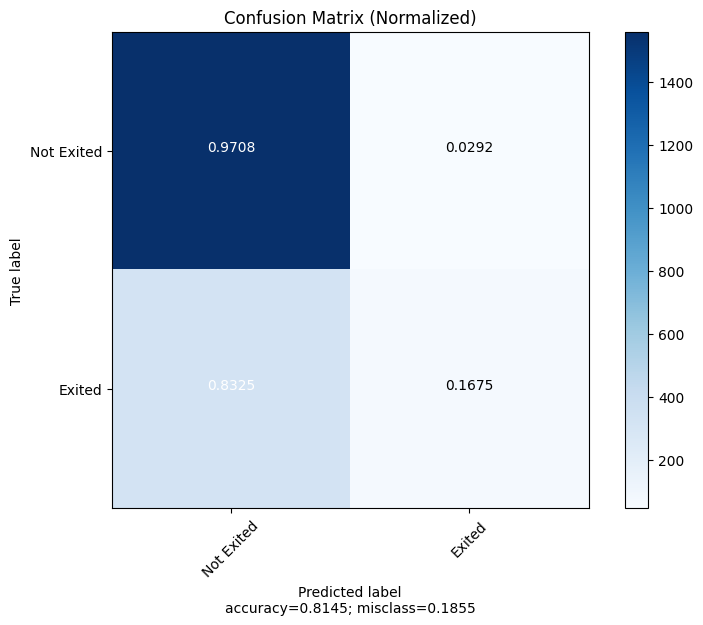

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.814536,0.569139,0.73524,0.828465,0.970753,0.893983,0.580357,0.167526,0.26


In [106]:
pred = model_LR.predict(test[features])
predp = model_LR.predict_proba(test[features])[:,1]

cm = confusion_matrix(test[target], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

summary_of_models = classification_report_to_dataframe(test[target], pred, predp, model_name = 'Logistic Regression')
summary_of_models

#### 2.1.2 - Logistic Regression Model

In [107]:
parameters = {'max_depth': [2, 3, 4, 6, 10, 15],
              'n_estimators': [50, 100, 300, 500]}
GB = GBSklearn()
model_GB = GridSearchCV(GB, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(train[features], train[target])
pd.DataFrame(model_GB.cv_results_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.430685,0.068218,0.004248,0.000386,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.863409,0.860815,0.855799,0.859561,0.853292,0.858575,0.003605,13
1,0.952162,0.104689,0.009556,0.008480,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.867168,0.867712,0.856426,0.863323,0.855172,0.861960,0.005268,9
2,2.777709,0.299572,0.012969,0.007169,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.872180,0.872100,0.856426,0.863323,0.857053,0.864217,0.006905,5
3,4.487632,0.271373,0.012335,0.000739,2,500,"{'max_depth': 2, 'n_estimators': 500}",0.874060,0.872727,0.859561,0.860815,0.853918,0.864216,0.007856,6
4,0.598434,0.094868,0.011694,0.012975,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.866541,0.867712,0.859561,0.862069,0.856426,0.862462,0.004224,8
5,1.269617,0.063955,0.010691,0.008029,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.873434,0.870846,0.862069,0.868966,0.858307,0.866724,0.005649,1
6,3.606573,0.219157,0.010844,0.000297,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.870927,0.868339,0.860188,0.865204,0.857680,0.864468,0.004932,3
7,7.914665,0.685116,0.026967,0.008337,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.864662,0.866458,0.855799,0.860815,0.857680,0.861083,0.004031,11
8,0.850003,0.159056,0.008741,0.002428,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.874060,0.865204,0.859561,0.871473,0.858934,0.865847,0.006113,2
9,2.499700,0.169916,0.013933,0.008087,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.875313,0.869592,0.857053,0.862069,0.857680,0.864342,0.007080,4


In [108]:
print(model_GB.best_params_)

{'max_depth': 3, 'n_estimators': 100}


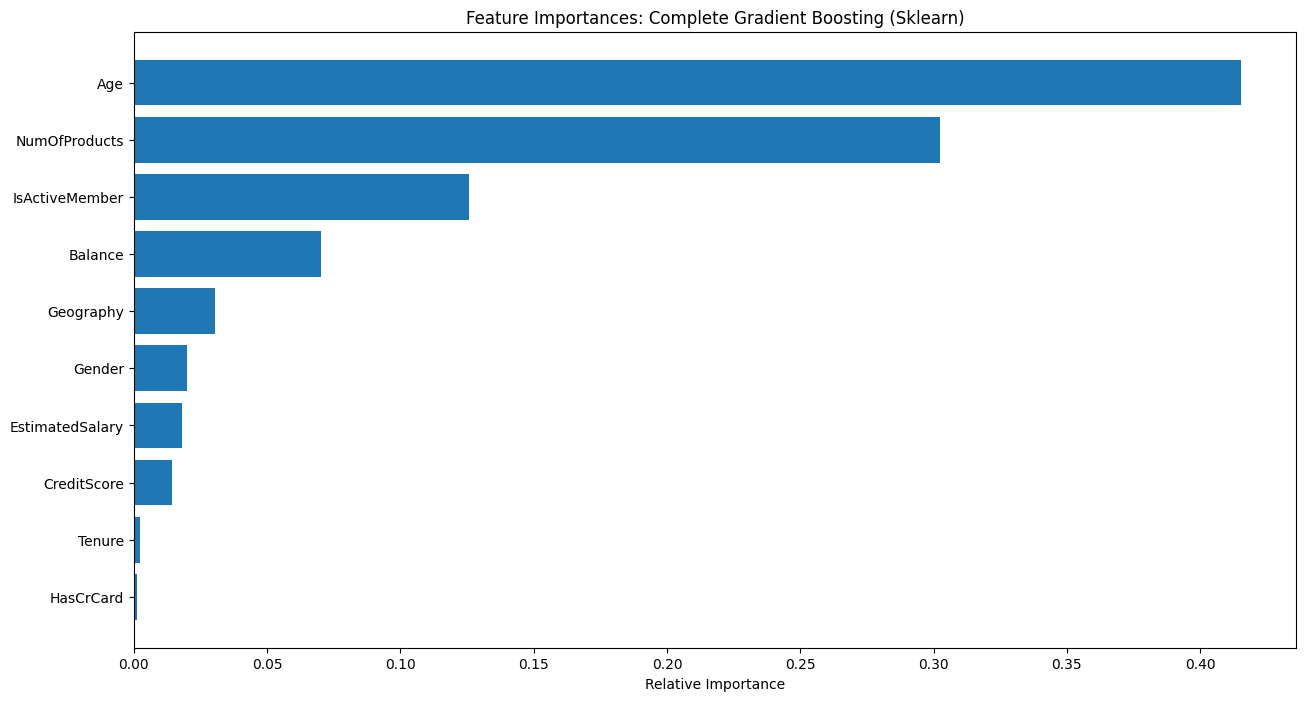

In [109]:
model = GBSklearn(**model_GB.best_params_)
model.fit(train[features], train[target])

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Complete Gradient Boosting (Sklearn)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

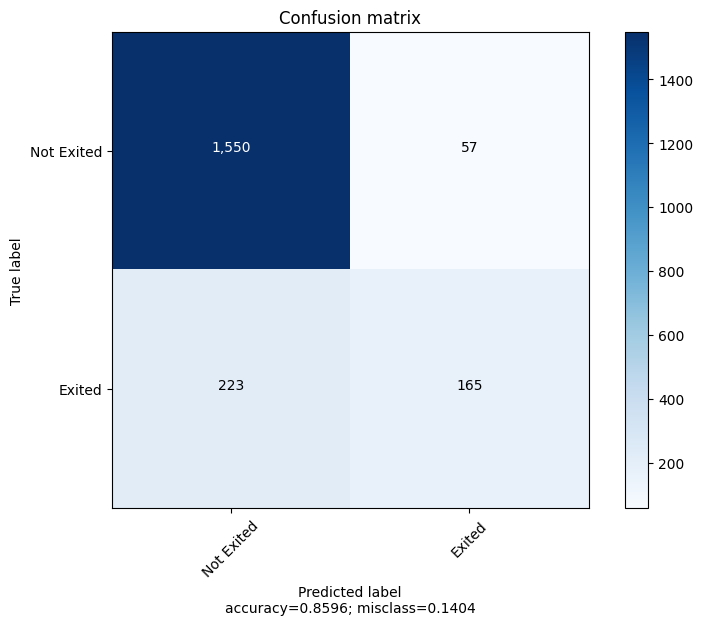

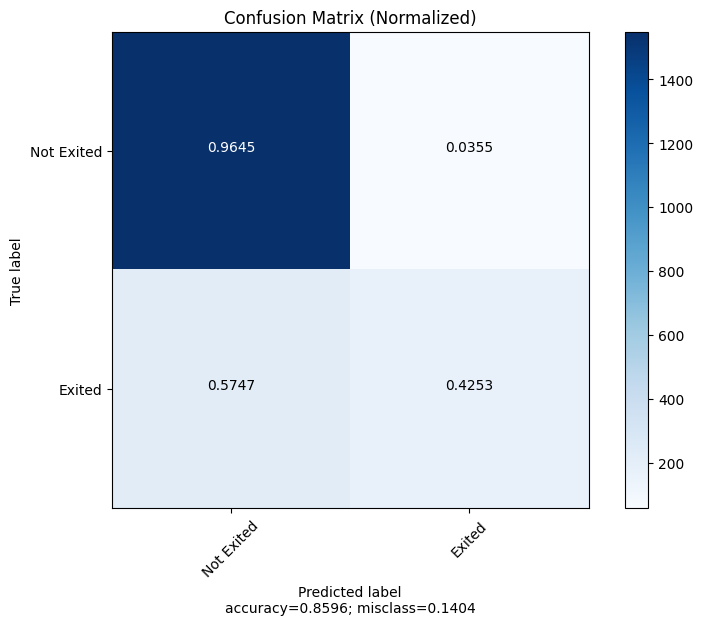

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (Sklearn),no,0.859649,0.694894,0.855086,0.874224,0.96453,0.91716,0.743243,0.425258,0.540984


In [110]:
pred = model_GB.predict(test[features])
predp = model_GB.predict_proba(test[features])[:,1]

cm = confusion_matrix(test[target], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[target], pred, predp, model_name = 'Gradient Boosting (Sklearn)')
temp

In [111]:
summary_of_models = pd.concat([summary_of_models, temp], axis=0)
summary_of_models


,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.814536,0.569139,0.735240,0.828465,0.970753,0.893983,0.580357,0.167526,0.260000
0,Gradient Boosting (Sklearn),no,0.859649,0.694894,0.855086,0.874224,0.964530,0.917160,0.743243,0.425258,0.540984


#### 2.1.3 - XGBoost Model

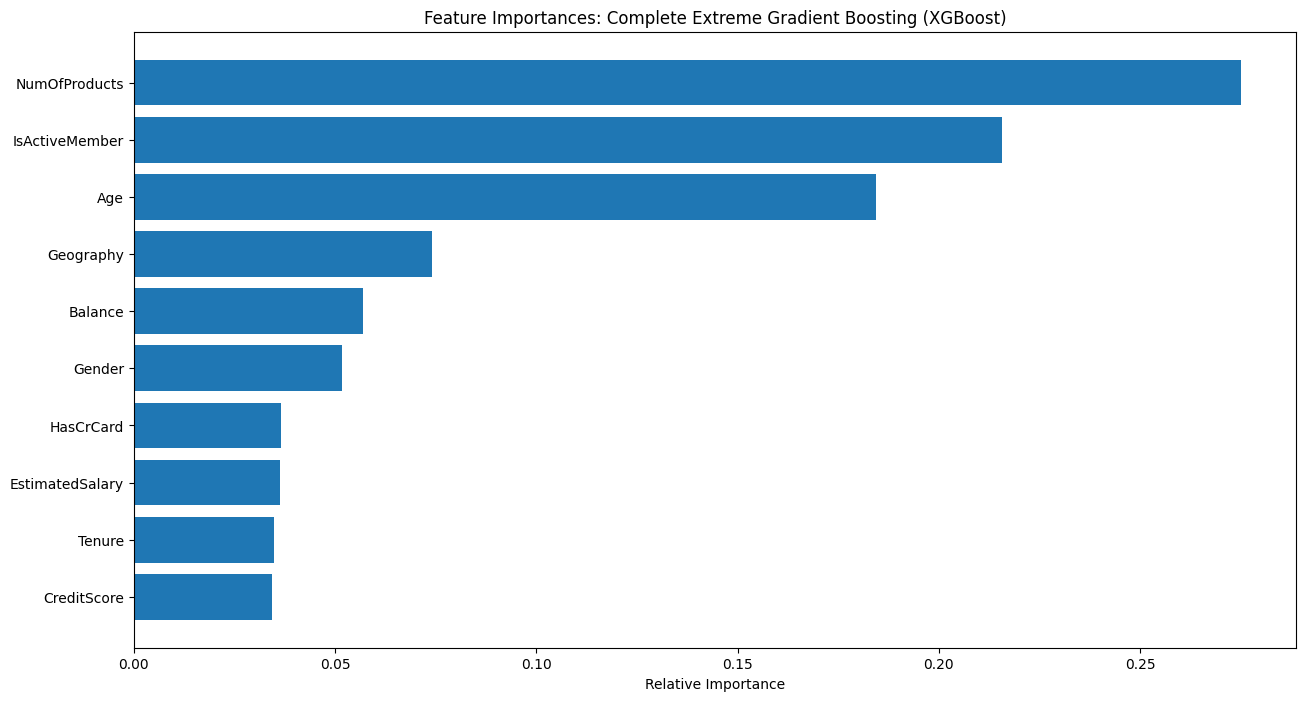

In [112]:
model_XGB = XGB(max_depth = 6,
            learning_rate = .1,
            n_estimators = 100,
            reg_lambda = 0.5,
            reg_alpha = 0,
            verbosity = 1,
            n_jobs = -1,
            tree_method = 'gpu_hist').fit(train[features], train[target])

pred = model_XGB.predict(test[features])
predp = model_XGB.predict_proba(test[features])[:,1]

importances = model_XGB.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Complete Extreme Gradient Boosting (XGBoost)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

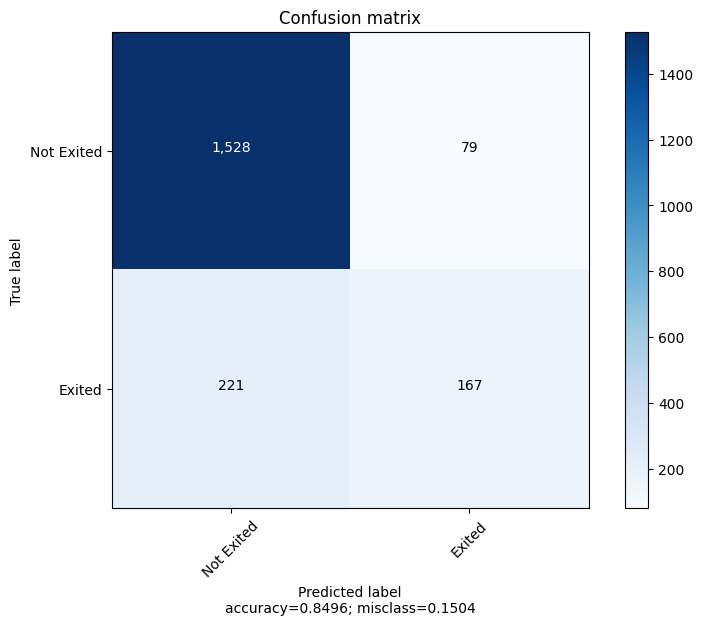

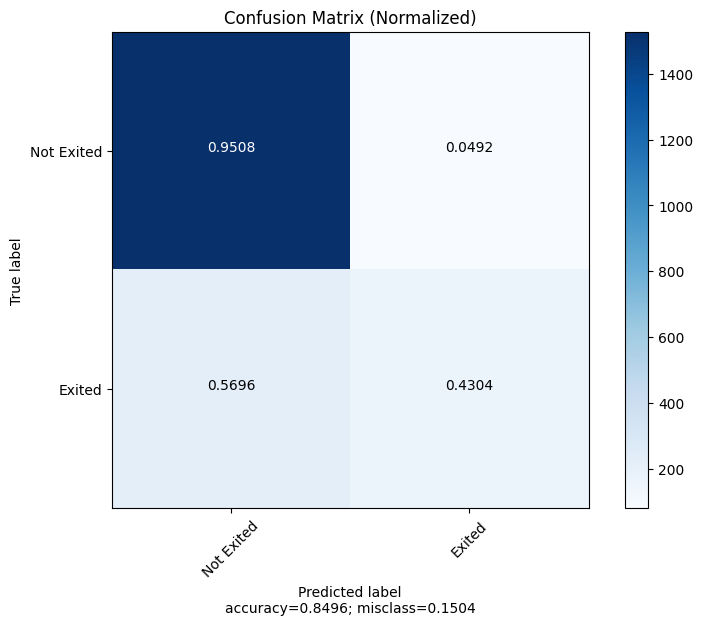

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (XGBoost),no,0.849624,0.690626,0.852724,0.873642,0.95084,0.910608,0.678862,0.430412,0.526814


In [113]:
cm = confusion_matrix(test[target], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[target], pred, predp, model_name = 'Gradient Boosting (XGBoost)', balanced = 'no')
temp

In [114]:
summary_of_models = pd.concat([summary_of_models, temp], axis=0)
summary_of_models

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.814536,0.569139,0.735240,0.828465,0.970753,0.893983,0.580357,0.167526,0.260000
0,Gradient Boosting (Sklearn),no,0.859649,0.694894,0.855086,0.874224,0.964530,0.917160,0.743243,0.425258,0.540984
0,Gradient Boosting (XGBoost),no,0.849624,0.690626,0.852724,0.873642,0.950840,0.910608,0.678862,0.430412,0.526814


### 2.2 - Using the balanced dataset

The provided data exhibits class imbalance, with 80% of the clients being labeled as not exited (0) and only 20% as exited (1). A model that predicts all clients as 0 would achieve 80% accuracy, but assessing the balanced accuracy, which considers the recall of each class, reveals the issue with such an approach.

To address this issue, one solution is to randomly remove data from the larger class until it matches the number of the smaller class, resulting in a balanced dataset where 50% of the instances are labeled as 0 and 50% as 1. This balancing step should be applied only to the training set, ensuring that the trained model is not biased while the test data remains untouched.

This step is called **Resampling**, it is a widely adopted technique for dealing with highly unbalanced datasets, it consists in removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![Getting Started](https://miro.medium.com/v2/resize:fit:725/1*7xf9e1EaoK5n05izIFBouA.png)


In [115]:
def resample_data(data, target):
    data_1 = data[data[target] == 1]
    data_0 = data[data[target] == 0]
    percentage = len(data_1)/len(data_0)
    temp = data_0.sample(frac = percentage, random_state = 1)

    data_new = pd.concat([data_1,temp],axis=0)
    data_new.sort_index(inplace = True)
    return data_new

In [116]:
trainB = resample_data(train, target = target)
print('Number of clients in the dataset is : {}'.format(len(df)))
print('Number of clients in the balanced train set is : {}'.format(len(trainB)))
print('Number of clients in the test set is : {}'.format(len(test)))

Number of clients in the dataset is : 9971
Number of clients in the balanced train set is : 3252
Number of clients in the test set is : 1995


In [117]:
exited_trainB = len(trainB[trainB['Exited'] == 1]['Exited'])
exited_trainB_perc = round(exited_trainB/len(trainB)*100,1)

exited_test = len(test[test['Exited'] == 1]['Exited'])
exited_test_perc = round(exited_test/len(test)*100,1)

print('Balanced Train set - Number of clients that have exited the program: {} ({}%)'.format(exited_trainB, exited_trainB_perc))
print('Test set - Number of clients that haven\'t exited the program: {} ({}%)'.format(exited_test, exited_test_perc))

Balanced Train set - Number of clients that have exited the program: 1626 (50.0%)
Test set - Number of clients that haven't exited the program: 388 (19.4%)


#### 2.2.1 - Logistic Regression Model

In [118]:
parameters = {'C': [0.01, 0.1, 1, 10],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [50, 100, 150]}
LR = LogisticRegression(penalty = 'l2')
model_LR = GridSearchCV(LR, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(trainB[features], trainB[target])
pd.DataFrame(model_LR.cv_results_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016901,0.000881,0.003623,0.001230,0.01,50,newton-cg,"{'C': 0.01, 'max_iter': 50, 'solver': 'newton-...",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
1,0.010375,0.004009,0.002638,0.000790,0.01,50,lbfgs,"{'C': 0.01, 'max_iter': 50, 'solver': 'lbfgs'}",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
2,0.009372,0.001697,0.003266,0.000439,0.01,50,liblinear,"{'C': 0.01, 'max_iter': 50, 'solver': 'libline...",0.701997,0.718894,0.726154,0.695385,0.680000,0.704486,0.016527,1
3,0.016838,0.004287,0.002469,0.000264,0.01,50,sag,"{'C': 0.01, 'max_iter': 50, 'solver': 'sag'}",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
4,0.015263,0.000774,0.002405,0.000274,0.01,50,saga,"{'C': 0.01, 'max_iter': 50, 'solver': 'saga'}",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
5,0.014262,0.001995,0.002502,0.000235,0.01,100,newton-cg,"{'C': 0.01, 'max_iter': 100, 'solver': 'newton...",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
6,0.008229,0.000960,0.002921,0.000705,0.01,100,lbfgs,"{'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
7,0.006235,0.001024,0.003124,0.001036,0.01,100,liblinear,"{'C': 0.01, 'max_iter': 100, 'solver': 'liblin...",0.701997,0.718894,0.726154,0.695385,0.680000,0.704486,0.016527,1
8,0.013066,0.002615,0.003192,0.000965,0.01,100,sag,"{'C': 0.01, 'max_iter': 100, 'solver': 'sag'}",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4
9,0.017161,0.001706,0.003212,0.000571,0.01,100,saga,"{'C': 0.01, 'max_iter': 100, 'solver': 'saga'}",0.712750,0.709677,0.726154,0.695385,0.678462,0.704485,0.016278,4


In [119]:
print(model_LR.best_params_)

{'C': 0.01, 'max_iter': 50, 'solver': 'liblinear'}


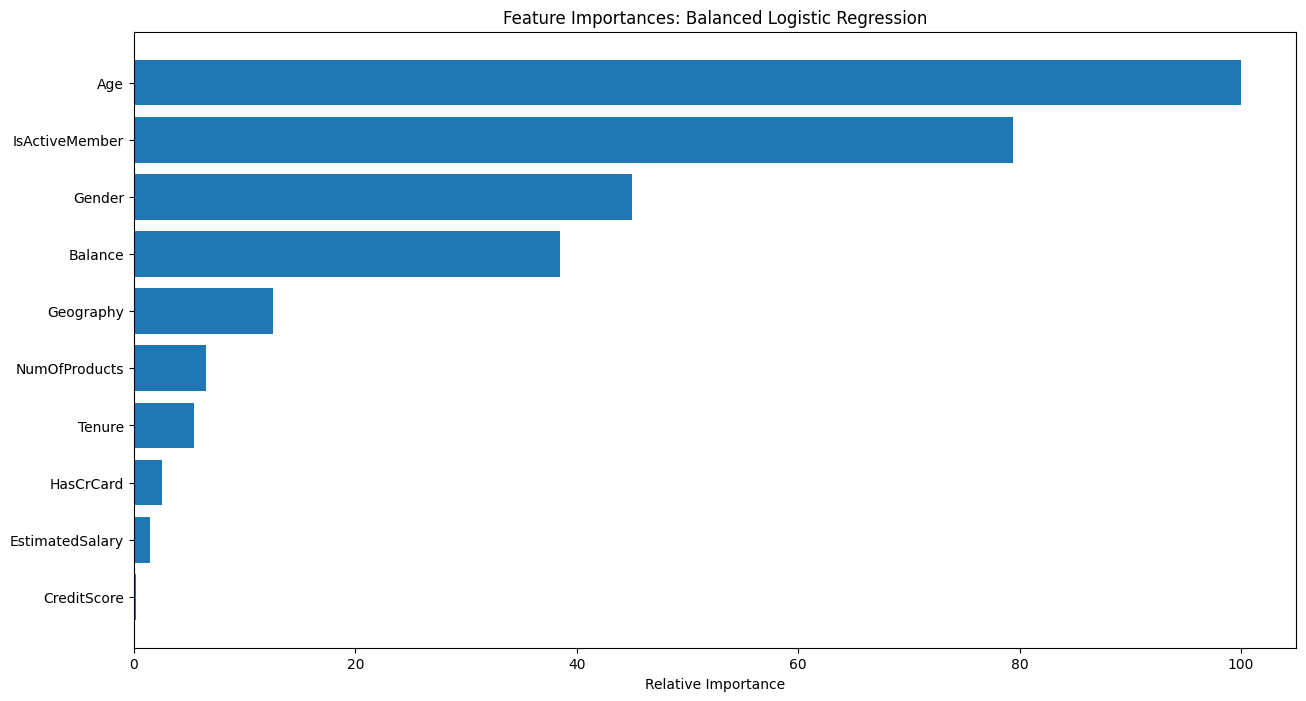

In [120]:
model = LogisticRegression(**model_LR.best_params_)
model.fit(trainB[features], trainB[target])

importances = abs(model.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Balanced Logistic Regression')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

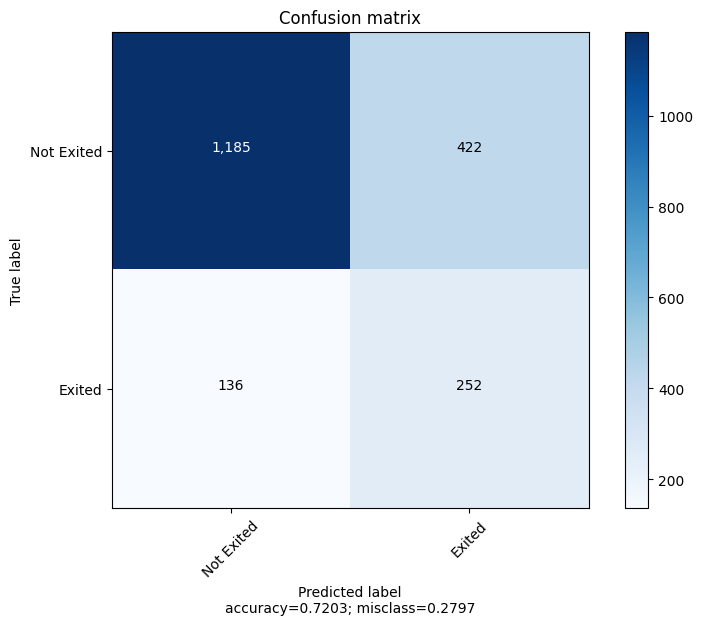

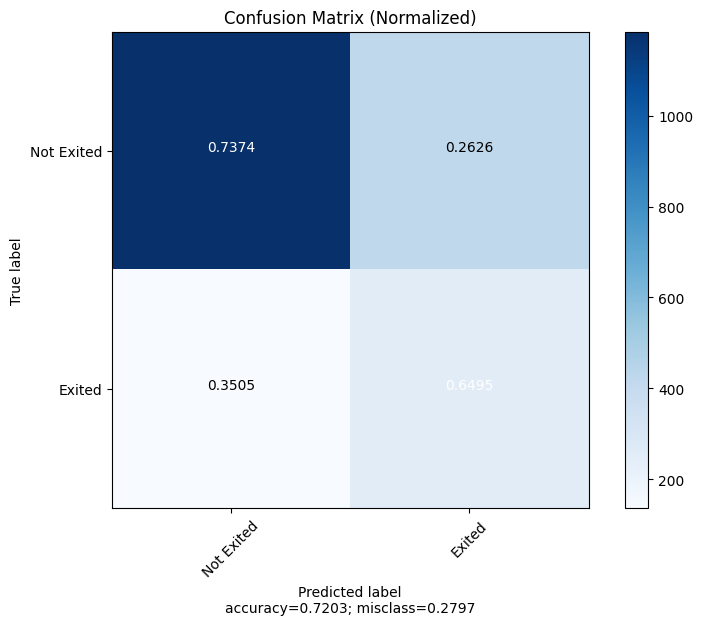

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,yes,0.720301,0.693442,0.748209,0.897048,0.737399,0.809426,0.373887,0.649485,0.474576


In [121]:
pred = model_LR.predict(test[features])
predp = model_LR.predict_proba(test[features])[:,1]

cm = confusion_matrix(test[target], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[target], pred, predp, model_name = 'Logistic Regression', balanced = 'yes')
temp

In [122]:
summary_of_models = pd.concat([summary_of_models, temp], axis=0)
summary_of_models

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.814536,0.569139,0.735240,0.828465,0.970753,0.893983,0.580357,0.167526,0.260000
0,Gradient Boosting (Sklearn),no,0.859649,0.694894,0.855086,0.874224,0.964530,0.917160,0.743243,0.425258,0.540984
0,Gradient Boosting (XGBoost),no,0.849624,0.690626,0.852724,0.873642,0.950840,0.910608,0.678862,0.430412,0.526814
0,Logistic Regression,yes,0.720301,0.693442,0.748209,0.897048,0.737399,0.809426,0.373887,0.649485,0.474576


#### 2.2.2 - Gradient Boosting Model


In [123]:
parameters = {'max_depth': [2, 3, 4, 6, 10, 15],
              'n_estimators': [50, 100, 300, 500]}
GB = GBSklearn()
model_GB = GridSearchCV(GB,
                        parameters,
                        cv = 5,
                        n_jobs = 10,
                        verbose = 1).fit(trainB[features], trainB[target])
pd.DataFrame(model_GB.cv_results_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.211204,0.011933,0.004361,0.000792,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.761905,0.769585,0.783077,0.763077,0.743077,0.764144,0.012946,9
1,0.665234,0.118340,0.006017,0.001589,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.771121,0.775730,0.786154,0.778462,0.753846,0.773063,0.010777,3
2,2.143927,0.225694,0.010433,0.003792,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.775730,0.788018,0.789231,0.766154,0.749231,0.773673,0.014873,2
3,3.338463,0.185300,0.012865,0.004253,2,500,"{'max_depth': 2, 'n_estimators': 500}",0.772657,0.780338,0.786154,0.761538,0.740000,0.768138,0.016304,7
4,0.419143,0.045993,0.005706,0.000943,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.771121,0.774194,0.795385,0.769231,0.750769,0.772140,0.014218,5
5,0.939088,0.138267,0.010016,0.005073,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.766513,0.780338,0.795385,0.766154,0.749231,0.771524,0.015479,6
6,2.720600,0.409363,0.014661,0.010709,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.769585,0.784946,0.770769,0.750769,0.741538,0.763522,0.015454,10
7,4.355420,0.266967,0.020288,0.008477,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.763441,0.781874,0.767692,0.755385,0.741538,0.761986,0.013356,12
8,0.631349,0.102864,0.014381,0.010670,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.778802,0.774194,0.787692,0.770769,0.752308,0.772753,0.011694,4
9,1.096554,0.087990,0.007445,0.000484,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.777266,0.783410,0.790769,0.766154,0.752308,0.773981,0.013510,1


In [124]:
print(model_GB.best_params_)

{'max_depth': 4, 'n_estimators': 100}


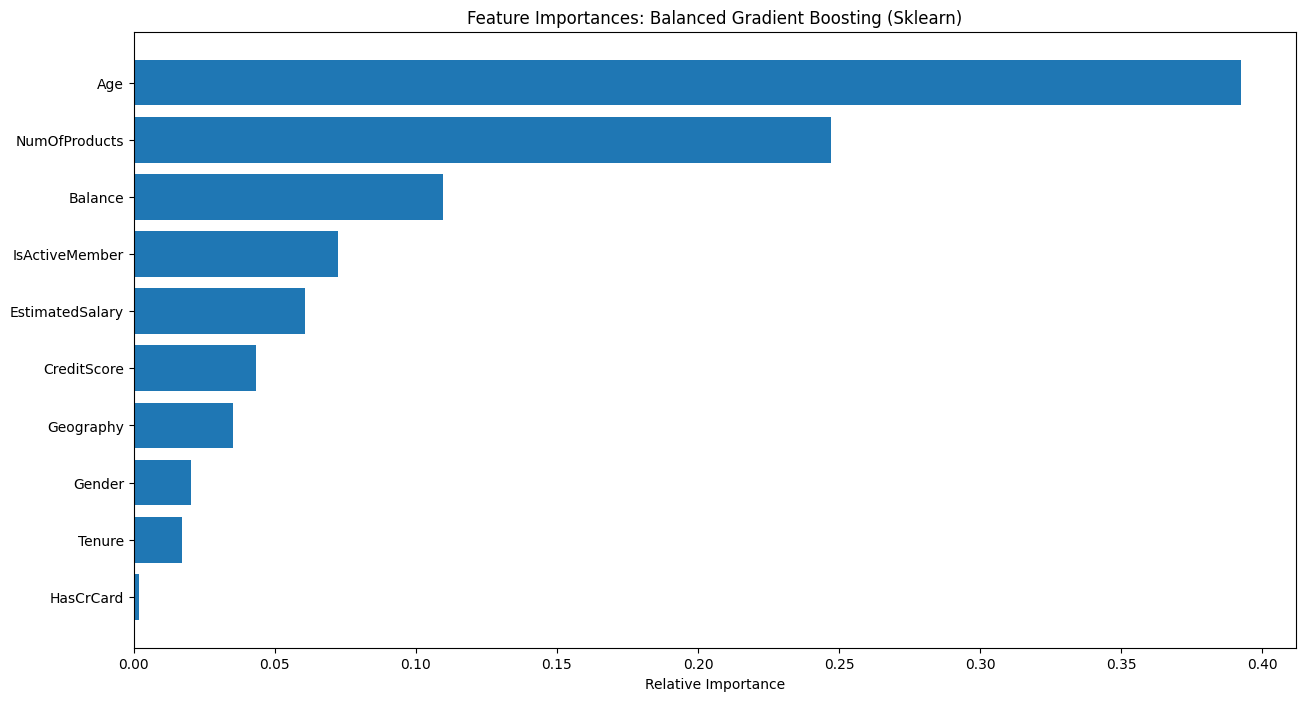

In [125]:
model = GBSklearn(**model_GB.best_params_)
model.fit(trainB[features], trainB[target])

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Balanced Gradient Boosting (Sklearn)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

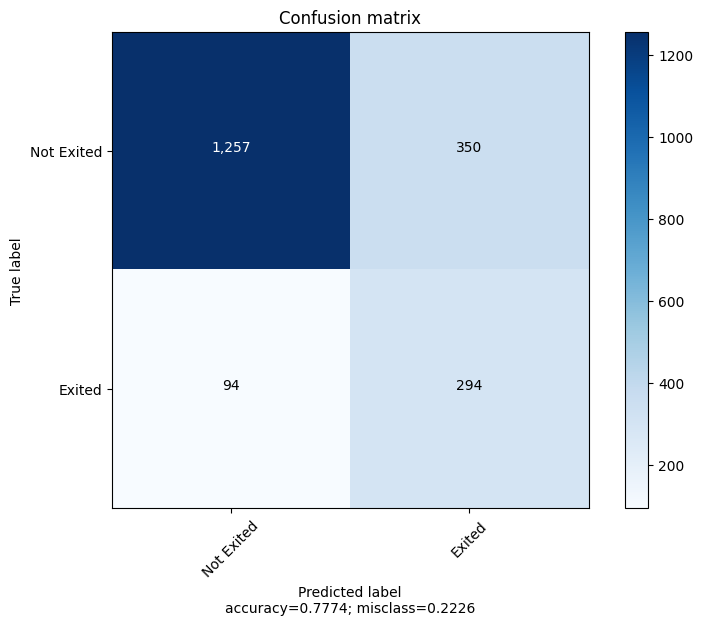

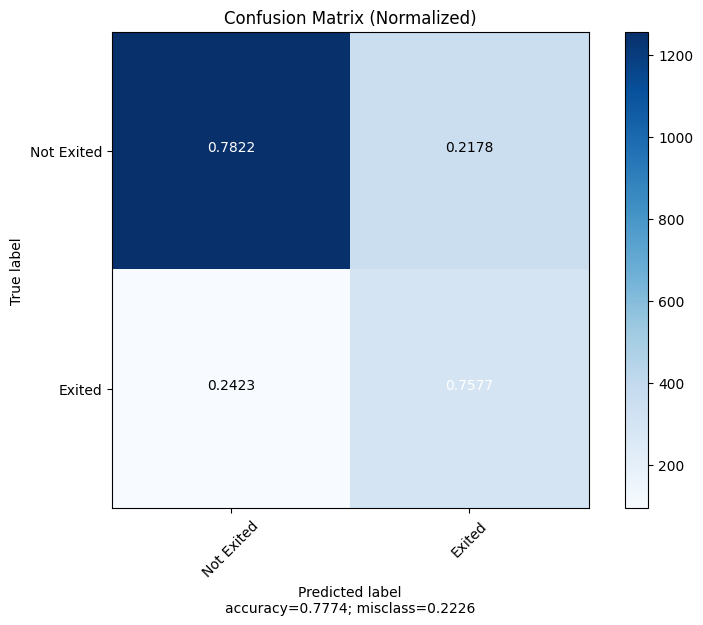

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (Sklearn),yes,0.777444,0.769967,0.851645,0.930422,0.782203,0.849899,0.456522,0.757732,0.569767


In [126]:
pred = model_GB.predict(test[features])
predp = model_GB.predict_proba(test[features])[:,1]

cm = confusion_matrix(test[target], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[target], pred, predp, model_name = 'Gradient Boosting (Sklearn)', balanced = 'yes')
temp

In [127]:
summary_of_models = pd.concat([summary_of_models, temp], axis=0)
summary_of_models

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.814536,0.569139,0.735240,0.828465,0.970753,0.893983,0.580357,0.167526,0.260000
0,Gradient Boosting (Sklearn),no,0.859649,0.694894,0.855086,0.874224,0.964530,0.917160,0.743243,0.425258,0.540984
0,Gradient Boosting (XGBoost),no,0.849624,0.690626,0.852724,0.873642,0.950840,0.910608,0.678862,0.430412,0.526814
0,Logistic Regression,yes,0.720301,0.693442,0.748209,0.897048,0.737399,0.809426,0.373887,0.649485,0.474576
0,Gradient Boosting (Sklearn),yes,0.777444,0.769967,0.851645,0.930422,0.782203,0.849899,0.456522,0.757732,0.569767


#### 2.2.3 - XGboost Model


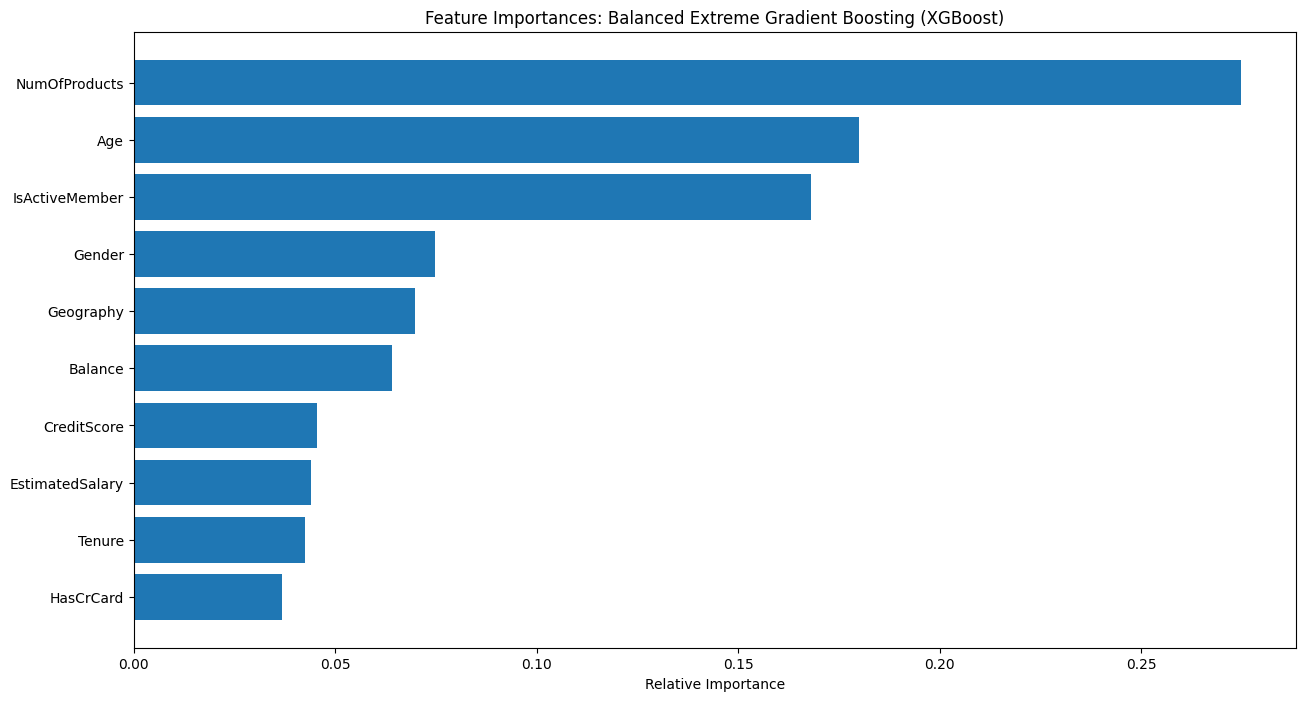

In [128]:
model_XGB = XGB(max_depth = 6,
            learning_rate = .1,
            n_estimators = 100,
            reg_lambda = 0.5,
            reg_alpha = 0,
            verbosity = 1,
            n_jobs = -1,
            tree_method = 'hist').fit(trainB[features], trainB[target])

pred = model_XGB.predict(test[features])
predp = model_XGB.predict_proba(test[features])[:,1]

importances = model_XGB.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Balanced Extreme Gradient Boosting (XGBoost)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

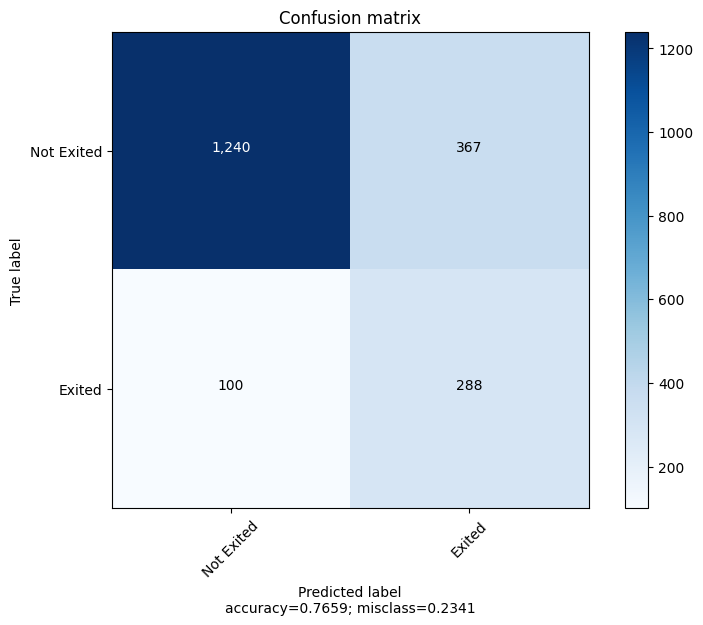

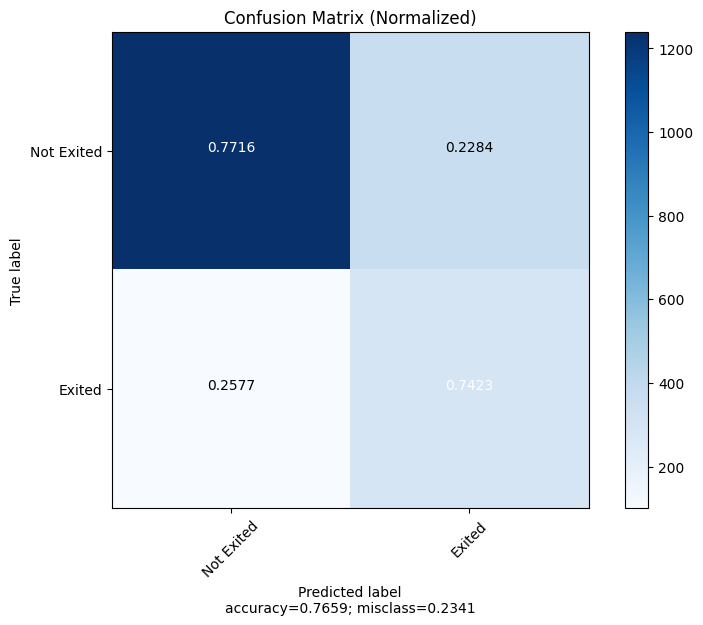

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (XGBoost),yes,0.765915,0.756946,0.84415,0.925373,0.771624,0.841534,0.439695,0.742268,0.552253


In [129]:
cm = confusion_matrix(test[target], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[target], pred, predp, model_name = 'Gradient Boosting (XGBoost)', balanced = 'yes')
temp

In [130]:
summary_of_models = pd.concat([summary_of_models, temp], axis=0)
summary_of_models

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.814536,0.569139,0.735240,0.828465,0.970753,0.893983,0.580357,0.167526,0.260000
0,Gradient Boosting (Sklearn),no,0.859649,0.694894,0.855086,0.874224,0.964530,0.917160,0.743243,0.425258,0.540984
0,Gradient Boosting (XGBoost),no,0.849624,0.690626,0.852724,0.873642,0.950840,0.910608,0.678862,0.430412,0.526814
0,Logistic Regression,yes,0.720301,0.693442,0.748209,0.897048,0.737399,0.809426,0.373887,0.649485,0.474576
0,Gradient Boosting (Sklearn),yes,0.777444,0.769967,0.851645,0.930422,0.782203,0.849899,0.456522,0.757732,0.569767
0,Gradient Boosting (XGBoost),yes,0.765915,0.756946,0.844150,0.925373,0.771624,0.841534,0.439695,0.742268,0.552253


## Conclusion

In this notebook, I explored the bank customer churn data with a focus on data processing for modeling and evaluating the performance of different algorithms. Initially, I analyzed the features to gain insights and then prepared the data for modeling by applying one-hot-encoding to the categorical features, splitting the data into train and test sets, and standardizing the features in each set.

I then proceeded to model the data using several algorithms, including logistic regression, gradient boosting, extreme gradient boosting.
Initially, all models showed reasonably good accuracy, however the balanced accuracy metric, which takes into account the imbalanced nature of the data, shows slightly smaller values.

To improve the prediction accuracy for the exited clients (labeled as 1), I balanced the training data by randomly removing clients labeled as 0 until the number of exited and not exited clients was almost the same. This resulted in increased balanced accuracy for all models, with the tree-based classifier models performing better.

Based on the score metrics and speed performance, I selected the Gradient Boosting Classifier as the preferred model, although the XGBoost model was a close runner-up. However, I believe that I can further improve the accuracy by applying feature engineering and trying other models, including ensembling all tested models.



